# Information Retrieval for high dimensional data

Group 4 - Amir Kaddour, Tinh-Toan Nong, Raja Judeh, Tim Music

## Task 1

### 1

The probability density function is zero for all $x$ values not in the range from $-\frac{d}{2} to \frac{d}{2}$.

Because $X$ is uniformly distributed, the value of the PDF remains constant for the cube $C_1$.
With the area below the PDF being $1$, $q$ can be computed as follows:

$q \cdot d = 1 $ when $p = 1$

When p or d are increasing, q must decrease to keep the area below the PDF equal to $1$

$\frac{p \cdot d}{q} = 1$

$d = \frac{q}{p}$



### 2
Probability to lie inside the interval: $Pr(\lvert X^1\rvert \le 2.576) = 0.99$  
Probability to lie outside the interval: $Pr(\lvert X^1\rvert \gt 2.576) = 1 - Pr(\lvert X^1\rvert \le 2.576) = 0.01$

$Pr(\lvert\lvert X^p\rvert\rvert_\infty \le 2.576) = 0.99^p $

$Pr(\lvert\lvert X^p\rvert\rvert_\infty \gt 2.576) = 1 - 0.99^p$

$Pr(\lvert\lvert X^2\rvert\rvert_\infty \gt 2.576) = 1 - 0.99^2 = 0.0199 \approx 1.9\%$

$Pr(\lvert\lvert X^3\rvert\rvert_\infty \gt 2.576) = 1 - 0.99^3 = 0.029701 \approx 2.97\%$

$Pr(\lvert\lvert X^{500}\rvert\rvert_\infty \gt 2.576) = 1 - 0.99^500 = 0.9934 \approx 99.3\%$

If the number of dimensions increase, the probability for the variable $X$ being outside the interval is increasing exponentially.



## Task 2

In [4]:
import numpy as np
from decimal import *
from matplotlib import pyplot as plt
from numpy.linalg import norm

def generate_random_vectors(n, d):      ### Generate n random vectors with d dimension 
    
    size = (n, d)
    random_vectors = np.random.uniform(-1, 1, size)
    
    return random_vectors

random_vectors = generate_random_vectors(100, 2) 
#print (random_vectors)       ### uncomment to see the results


In [5]:
def compute_angle(x, y):   ### Get the angle between two vectors
        
    cos_xy = np.dot(x, y) / (norm(x) * norm(y))
    angle_xy = np.arccos(cos_xy)
    angle_xy = np.rad2deg(angle_xy)  ###Convert deg to rad
    
    return angle_xy

def compute_min_angle(vector_index, allvectors): ## Get the minimum angle

    min_angle = 1000
    vector = allvectors[vector_index]
        
    for i in range(len(allvectors)):
        if i != vector_index:       ### ignore if this is the same vector
            angle = compute_angle(vector, allvectors[i])
            if angle < min_angle:
                min_angle = angle
                
    return min_angle

def average_minimum_angles(n, d):   #### Compute the average minimum angle of n random vectors in d-dimensional space
    
    random_vectors = generate_random_vectors(n, d)
    n = len(random_vectors)
    min_angles = np.zeros((n, 1))
    
    for i in range(n):
        
        min_angles[i] = compute_min_angle(i, random_vectors)   
    
    average_min_angles = np.mean(min_angles)
    
    return min_angles, average_min_angles

    

In [6]:
##### Average of minimum angle (in degree) of 100 samples in 2-dimensional space 
d = 2
sample_size = 100
min_angles, average_min_angles = average_minimum_angles(sample_size, d)

#print(min_angles)   ### uncomment to see the array
print('Average of minimum angle is: {}'.format(average_min_angles))   

Average of minimum angle is: 1.7947950475285384


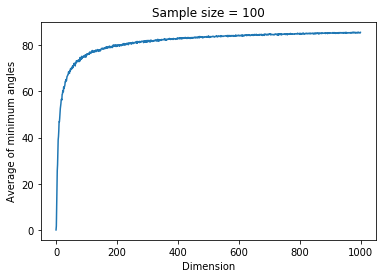

In [7]:
d = 1
d_max = 1000
sample_size = 100
average_alldimensions = np.zeros((d_max, 1))

for d in range(1, d_max + 1):
    average_alldimensions[d-1] = average_minimum_angles(sample_size , d)[1]
       
plt.plot(average_alldimensions)
plt.title('Sample size = {}'.format(sample_size ))
plt.xlabel('Dimension')
plt.ylabel('Average of minimum angles');
plt.show()

## Curse of Dimensionality
The curve shows that when the dimension d increases, the average minimum angle tends to 90°. This means that in high dimensional space, the likelihood for two randomly sampled vectors to be aligned is very low. Thus, the distribution of the correlation between two random vectors will be (almost) equal to zero when the space dimension increases. This also explains that the average minimum angle doesn't change by increasing the size of samples.

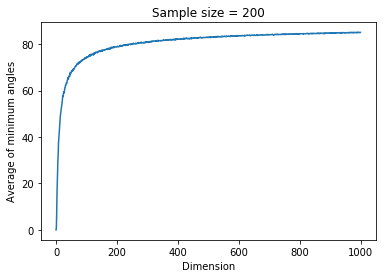

In [6]:
###### Increasing the Sample size = 200
d = 1
d_max =1000
sample_size = 200
average_alldimensions = np.zeros((d_max, 1))

for d in range(1, d_max + 1):
    average_alldimensions[d-1] = average_minimum_angles(sample_size , d)[1]

plt.plot(average_alldimensions)
plt.title('Sample size = {}'.format(sample_size ))
plt.xlabel('Dimension')
plt.ylabel('Average of minimum angles');
plt.show()

## Task 3

### 1
The table in fig 1 is a probability table: The sum of the cells is equal to 1

### 2
$E[Y|X=2] = P(Y=1|X=2)*1 + P(Y=2|X=2) * 2 + P(Y=3|X=2) * 3 = (P(Y=1;X=2)*1+P(Y=2;X=2)*2+P(Y=3;X=2)*3)/P(X=2) =(0.4*1+0.14*2+0.05*3)/0.59 = 83/59 $

$P(X=1|Y=3) = P(X=1;Y=3)/P(Y=3) = P(X=1;Y=3)/(P(X=1;Y=3)+P(X=2;Y=3)) = 13/18$

### 3
The function given isn't a joint density function for 2 variables because the integral of the function over X and Y is equal to 1/2 while it should be equal to 1 if it was a joint density function.

### 4
$P(X) = \int (P(X;Y),Y=0.. \infty) = 2*exp(-X)* \int (exp(-Y),Y=0..\infty) = 2*exp(-X)$

$P(Y) = \int (P(X;Y),X=0..Y) = 2*exp(-Y)* \int(exp(-X),X=0..Yy) = 2*exp(-Y)*(1-exp(-Y))$

### 5
$P(X<=2|Y=1/2) = \int(1/15*(2x+2),x=0..2) = 2/15*\int(x+1,x=0..2) = 8/15$

$S = (0.4*1+0.14*2+0.05*3)/0.59$

print(S)




## Task 4

Let $X$ be a Random Variable (RV) in $R^p$ (real vector of dim p) and $C$ its covariance matrix.

### 1
Let's prove $C = C^T$ (ie Transpose(C)):

$C^T = E[(X-X_{mean})(X-X_{mean})^T]^T = E[((X-X_{mean})(X-X_{mean})^T)^T] = E[((X-X_{mean})^T)^T(X-X_{mean})^T] = E[((X-X_{mean})(X-X_{mean})^T)] = C$

### 2
Let's prove that for any $u$ in $R^p$, $u^T C u \gt 0$:

$u^T C u = u^T E[(X-X_{mean})(X-X_{mean})^T] u = E[u^T (X-X_{mean})(X-X_{mean})^T u] $

Let $s = u^T (X-X_{mean})$
Then $s$ is a scalar (scalar product of 2 vectors in $R^p$) and $s^t = s$.

So $u^T C u = E[s^2] = \sigma^2 \gt 0$
